In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class LoadData(Dataset):
    def __init__(self, file_path):
        self.data = self.load_jsonl(file_path)

    def load_jsonl(self, file_path):
        with open(file_path, 'r', encoding = 'utf-8') as f:
            return [json.loads(line) for line in f]
            
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [5]:
df = LoadData(file_path = 'data/preprocessed/method-level-mcsn.jsonl')

In [7]:
dataloader = DataLoader(df, batch_size = 32, shuffle = True)

### EDA

In [9]:
df_pandas = pd.read_json('data/preprocessed/method-level-mcsn.jsonl')

In [11]:
df_pandas.head()

,repo_name,method_name,method_code,method_summary,original_method_code,method_path
0,tensorflow/probability,Normal._inv_z,"def _inv_z(self, z):\n """"""""""""\n with tf....",Reconstruct input `x` from a its normalized ve...,"def _inv_z(self, z):\n """"""Reconstruct input...",https://github.com/tensorflow/probability/blob...
1,tensorflow/probability,semilocal_linear_trend_transition_matrix,def semilocal_linear_trend_transition_matrix(a...,Build the transition matrix for a semi-local l...,def semilocal_linear_trend_transition_matrix(a...,https://github.com/tensorflow/probability/blob...
2,tensorflow/probability,semilocal_linear_trend_transition_noise,def semilocal_linear_trend_transition_noise(le...,Build the transition noise model for a semi-lo...,def semilocal_linear_trend_transition_noise(le...,https://github.com/tensorflow/probability/blob...
3,tensorflow/probability,_randomize,"def _randomize(coeffs, radixes, seed=None):\n ...",Applies the Owen (2017) randomization to the c...,"def _randomize(coeffs, radixes, seed=None):\n ...",https://github.com/tensorflow/probability/blob...
4,tensorflow/probability,_base_expansion_size,"def _base_expansion_size(num, bases):\n """"""""""...",Computes the number of terms in the place valu...,"def _base_expansion_size(num, bases):\n """"""Co...",https://github.com/tensorflow/probability/blob...


In [13]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11270 entries, 0 to 11269
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   repo_name             11270 non-null  object
 1   method_name           11270 non-null  object
 2   method_code           11270 non-null  object
 3   method_summary        11270 non-null  object
 4   original_method_code  11270 non-null  object
 5   method_path           11270 non-null  object
dtypes: object(6)
memory usage: 528.4+ KB


In [15]:
df_pandas.describe()

,repo_name,method_name,method_code,method_summary,original_method_code,method_path
count,11270,11270,11270,11270,11270,11270
unique,71,10804,11270,10619,11270,11270
top,cloud9ers/gurumate,main,"def _inv_z(self, z):\n """"""""""""\n with tf....",Instance depends on the API,"def _inv_z(self, z):\n """"""Reconstruct input...",https://github.com/tensorflow/probability/blob...
freq,1356,63,1,57,1,1


In [17]:
print(df_pandas['method_summary'].apply(len).describe())

count    11270.000000
mean        67.235404
std         41.254340
min         11.000000
25%         38.000000
50%         55.000000
75%         83.000000
max        199.000000
Name: method_summary, dtype: float64


In [35]:
print(df_pandas['method_code'].apply(len).describe())

count    11270.000000
mean       717.564862
std        871.653545
min         80.000000
25%        247.000000
50%        432.000000
75%        833.000000
max      27986.000000
Name: method_code, dtype: float64


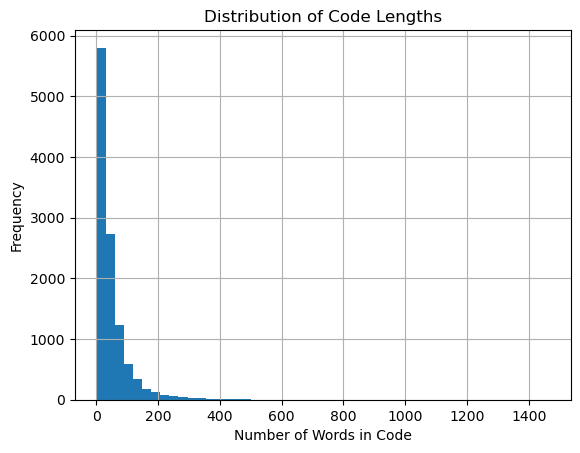

In [19]:
df_pandas['code_length'] = df_pandas['method_code'].apply(lambda x: len(x.split()))
df_pandas['code_length'].hist(bins=50)
plt.xlabel("Number of Words in Code")
plt.ylabel("Frequency")
plt.title("Distribution of Code Lengths")
plt.show()

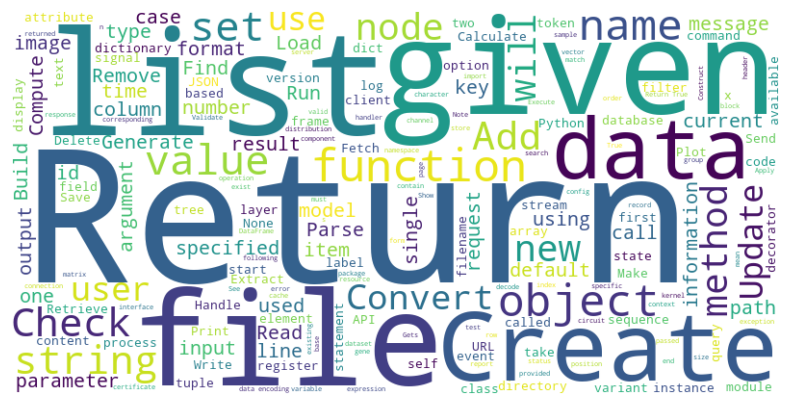

In [20]:
from wordcloud import WordCloud

text = " ".join(df_pandas['method_summary'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

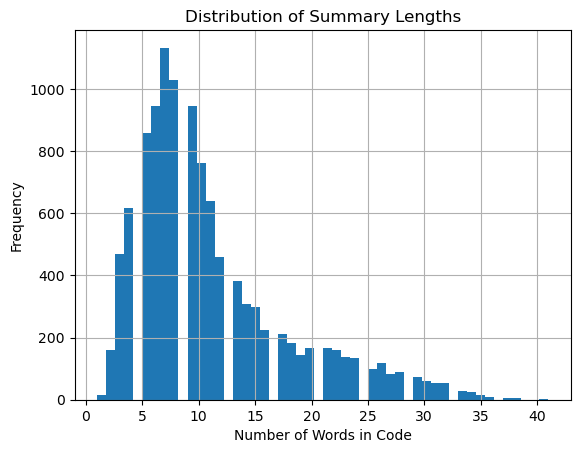

In [23]:
df_pandas["summary_length"] = df_pandas["method_summary"].apply(lambda x: len(x.split()))
df_pandas['summary_length'].hist(bins=50)
plt.xlabel("Number of Words in Code")
plt.ylabel("Frequency")
plt.title("Distribution of Summary Lengths")
plt.show()

C:\Users\aarus\AppData\Local\Temp\ipykernel_27580\1508611100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_r")


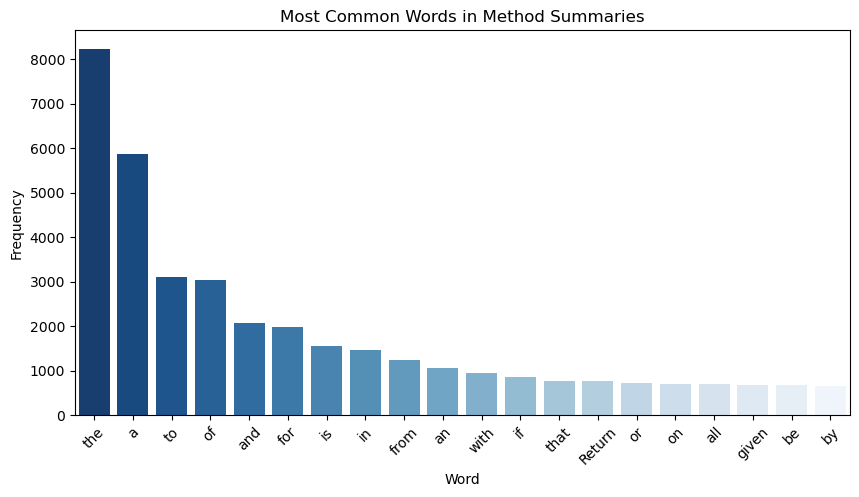

In [25]:
from collections import Counter
import seaborn as sns

all_words = " ".join(df_pandas["method_summary"]).split()
word_freq = Counter(all_words)

# Plot top 20 words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Most Common Words in Method Summaries")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

C:\Users\aarus\AppData\Local\Temp\ipykernel_27580\2029906929.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(code_words), y=list(code_counts), palette="Greens_r")


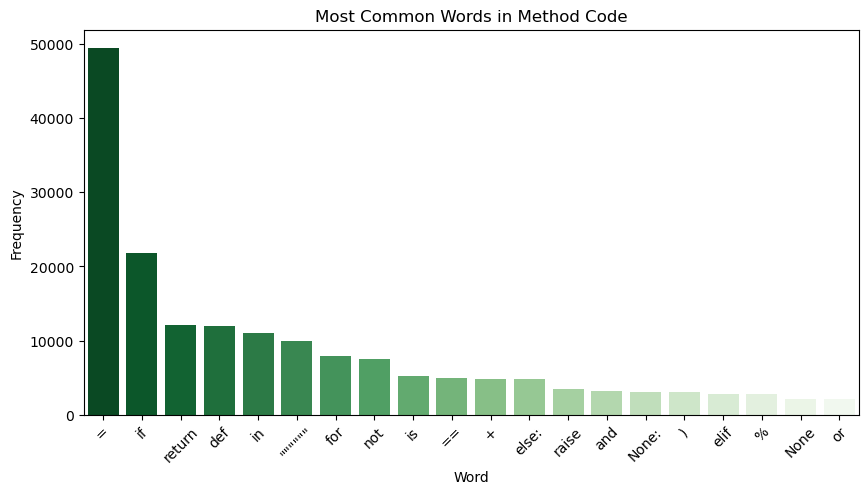

In [27]:
# Tokenize and count word frequencies in method_code
all_code_words = " ".join(df_pandas["method_code"]).split()
code_word_freq = Counter(all_code_words)

# Plot top 20 code words
top_code_words = code_word_freq.most_common(20)
code_words, code_counts = zip(*top_code_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(code_words), y=list(code_counts), palette="Greens_r")
plt.xticks(rotation=45)
plt.title("Most Common Words in Method Code")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

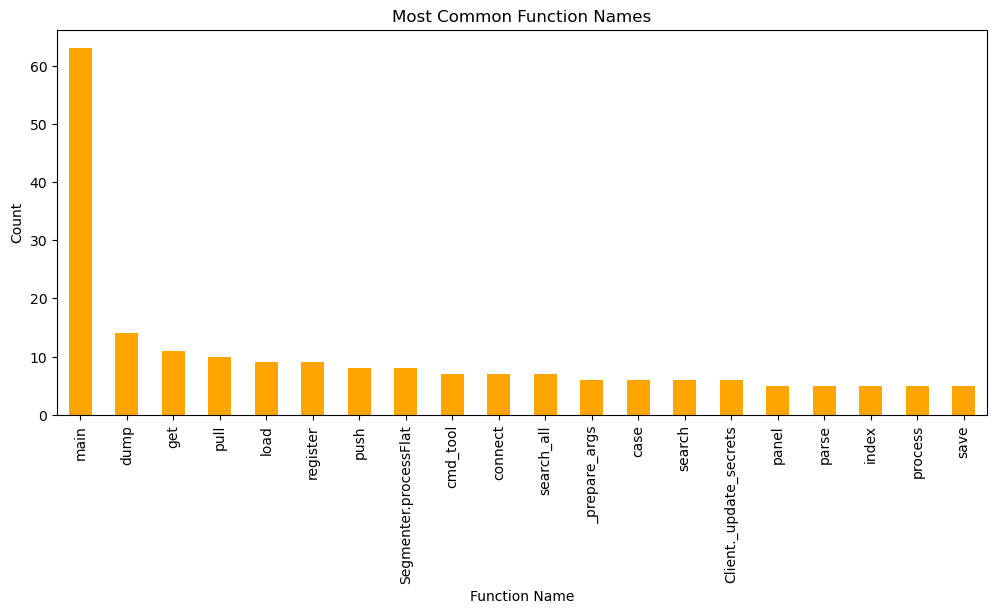

In [29]:
df_pandas["method_name"].value_counts().head(20).plot(kind="bar", figsize=(12, 5), color="orange")
plt.xlabel("Function Name")
plt.ylabel("Count")
plt.title("Most Common Function Names")
plt.show()

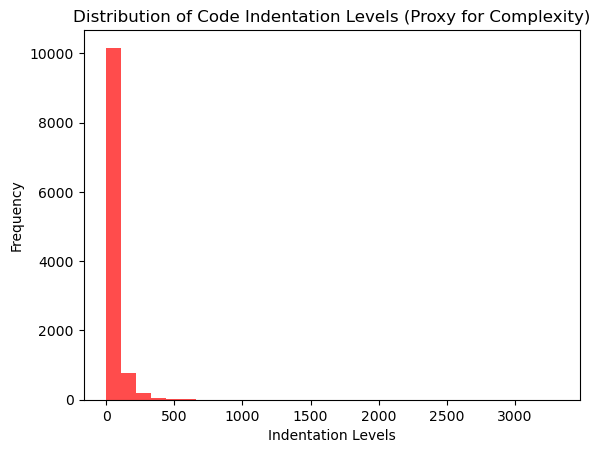

In [31]:
# Count indentation levels (proxy for complexity)
df_pandas["indentation_levels"] = df_pandas["method_code"].apply(lambda x: x.count("    "))

plt.hist(df_pandas["indentation_levels"], bins=30, color="red", alpha=0.7)
plt.xlabel("Indentation Levels")
plt.ylabel("Frequency")
plt.title("Distribution of Code Indentation Levels (Proxy for Complexity)")
plt.show()